In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn import linear_model

In [5]:
                              #Finding the NULL values(None)
import matplotlib.pyplot as plt
data  = pd.read_csv('CatData.csv')
rows = data.isnull().sum()
print("Total Null values in the each rows of the file : ")
print(rows)
data.info()



Total Null values in the each rows of the file : 
Tail Length (cm)    0
Mass (kg)           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tail Length (cm)  342 non-null    float64
 1   Mass (kg)         342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [6]:
num = int(len(data)*0.8) #Taking 80% data
train = data[:num]
test = data[num:]
print(" Data : ",len(data))
print(" Train : ",len(train))
print(" Test : ",len(test))

 Data :  342
 Train :  273
 Test :  69


In [7]:
reg = linear_model.LinearRegression()
train_x = np.array(train[['Tail Length (cm)']])
train_y = np.array(train[['Mass (kg)']])
reg.fit(train_x,train_y)
a_slope = reg.coef_
a_intercept = reg.intercept_
print("Slope : ",a_slope)
print("Intercept : ",a_intercept)

Slope :  [[0.48913766]]
Intercept :  [-5.57328662]


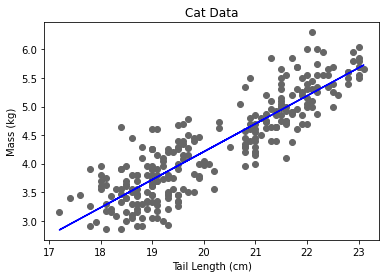

In [8]:

plt.title('Cat Data')
plt.xlabel('Tail Length (cm)')
plt.ylabel('Mass (kg)')
plt.scatter(train['Tail Length (cm)'],train['Mass (kg)'],color = '0.4')
plt.plot(train_x,a_slope*train_x+a_intercept,color = 'blue')
plt.show()

In [9]:
pred_test = reg.predict(test[["Tail Length (cm)"]])
pred_test[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[4.84534548],
       [3.8181564 ],
       [4.01381146],
       [3.86707016],
       [3.62250133]])

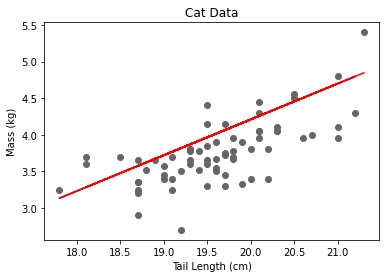

In [10]:

plt.title('Cat Data')
plt.xlabel('Tail Length (cm)')
plt.ylabel('Mass (kg)')
plt.scatter(test['Tail Length (cm)'],test['Mass (kg)'],color = '0.4')
plt.plot(test['Tail Length (cm)'],pred_test,color = 'red')
plt.show()

In [11]:
pred_data = reg.predict(data[['Tail Length (cm)']])
pred_test[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[4.84534548],
       [3.8181564 ],
       [4.01381146],
       [3.86707016],
       [3.62250133]])

In [12]:
AP_data= pd.DataFrame({"Actual":data['Mass (kg)'],"Predicted":pred_data[:][0][0]})
print(AP_data.head())

   Actual  Predicted
0    3.75   3.280105
1    3.80   3.280105
2    3.25   3.280105
3    3.45   3.280105
4    3.65   3.280105


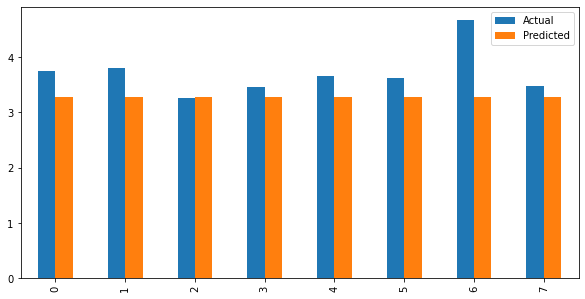

In [13]:
AP_data.head(8).plot(kind = 'bar',figsize = (10,5))
plt.show()

In [16]:
test_x = np.array(test[['Tail Length (cm)']])
test_y = np.array(test[['Mass (kg)']])
pred_y = reg.predict(test_x)
res = pred_y - test_y
RSS = (res*res).sum()
print("Residual Sum of Square : ",RSS)

Residual Sum of Square :  11.866045989424634
